# Sales Prediction based On Advertising Amount 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import Dataset
sale = pd.read_csv(r"C:\Users\aksha\Desktop\Internship\Oasis Infobyte\Sales Prediction\Advertising.csv")

In [3]:
sale

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Data Preprocessing

In [4]:
sale.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
# Drop unimporatnat columns
sale.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
sale.shape

(200, 4)

In [7]:
# Check datatype and information
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# Check some statistics
sale.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
# Check any Null Values
sale.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
# Check Correlation between sales and product
sale.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# Data Visualization

<AxesSubplot:>

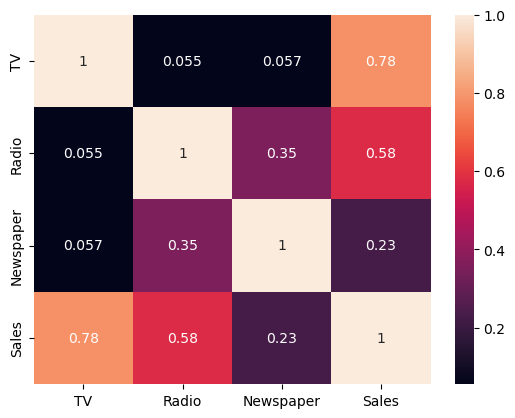

In [11]:
sns.heatmap(sale.corr(), annot=True)

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

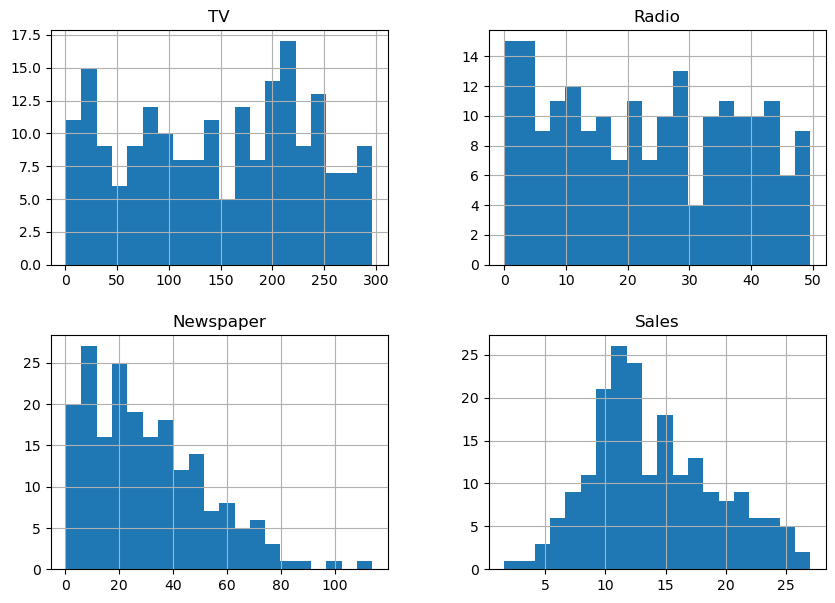

In [12]:
sale.hist(bins=20, figsize=(10,7))

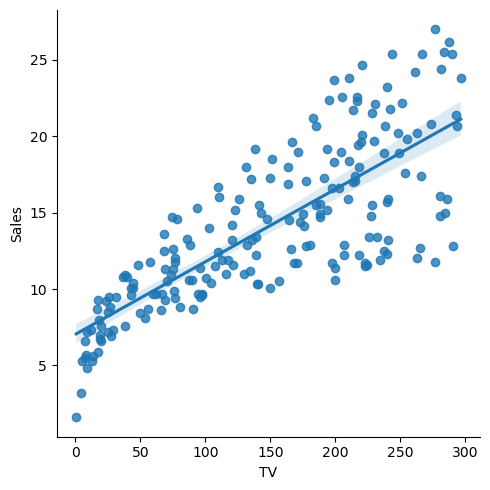

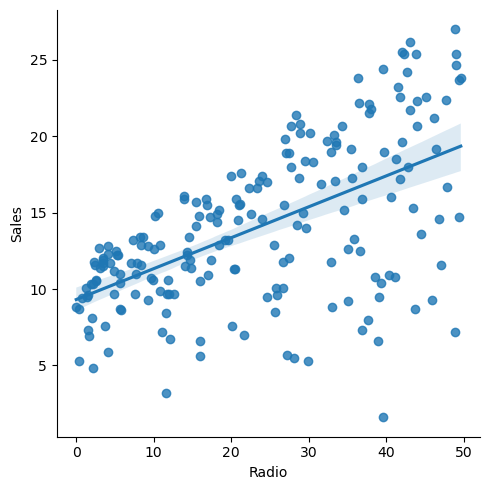

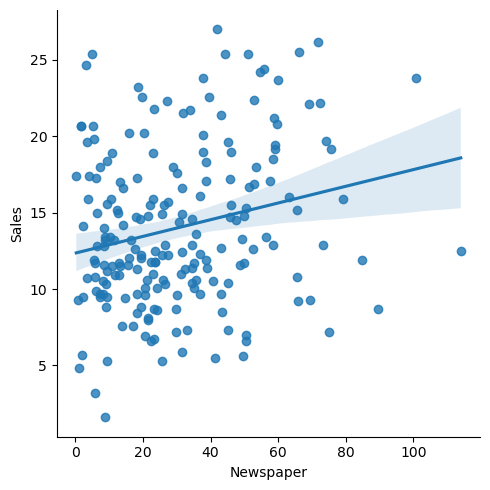

In [13]:
sns.lmplot(data=sale, x='TV', y='Sales')
sns.lmplot(data=sale, x='Radio', y='Sales')
sns.lmplot(data=sale, x='Newspaper', y='Sales')

<AxesSubplot:>

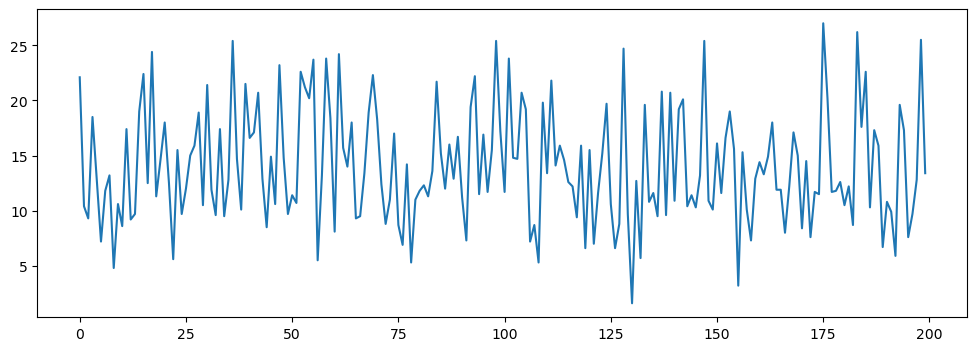

In [14]:
fig = plt.figure(figsize=(12,4))
sale['Sales'].plot()

# Model Preparation

In [15]:
# Create Independent and Dependent Varaible
X = sale.drop('Sales', axis=1).values
y = sale.loc[:,'Sales'].values

In [16]:
# Spliting the Dataset for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Model

In [17]:
# Build and Fit model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)
lin_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [18]:
# Check Evaluation Metrics Error
rmse = np.sqrt(mean_squared_error(y_true= y_test, y_pred= lin_pred))
mape = mean_absolute_percentage_error(y_true= y_test, y_pred= lin_pred)
Adj_Sqaure = r2_score(y_true= y_test, y_pred= lin_pred)
print('RMSE :', rmse)
print('MAPE :', mape)
print('Adj Square :', Adj_Sqaure)

RMSE : 1.78159966153345
MAPE : 0.15198846602831223
Adj Square : 0.899438024100912


### Random Forest Regressor

In [19]:
# Build and Fit Model
ran_model = RandomForestRegressor()
ran_model.fit(X_train, y_train)
ran_pred = ran_model.predict(X_test)
ran_pred

array([17.546, 21.555, 20.564,  6.503, 23.252, 13.15 , 22.659,  9.558,
       11.846, 15.38 ,  7.517,  9.099, 12.172,  4.61 , 10.437, 12.474,
        6.196, 16.445, 11.234, 19.572, 20.167, 13.017, 10.164, 22.196,
        9.979,  8.976, 22.523, 12.547, 10.223,  5.053, 11.514, 10.878,
       22.004,  8.221, 15.311, 20.446, 11.918, 20.537, 12.232,  7.565])

In [20]:
# Check Evaluation Metrics Error
rmse = np.sqrt(mean_squared_error(y_true= y_test, y_pred= ran_pred))
mape = mean_absolute_percentage_error(y_true= y_test, y_pred= ran_pred)
Adj_Sqaure = r2_score(y_true= y_test, y_pred= ran_pred)
print('RMSE :', rmse)
print('MAPE :', mape)
print('Adj Square :', Adj_Sqaure)

RMSE : 0.7526405184415725
MAPE : 0.05618720783898483
Adj Square : 0.9820531288519705


## Predict New Data

In [21]:
# New Data for Prediction
Predict = pd.DataFrame({'TV': [147.04,230.1,232.1], 'Radio' : [23.26,37.8,8.6], 'Newspaper' : [30.55,69.2,8.7]})

In [22]:
# Predict the data using linear regression model
lin_pred = lin_model.predict(Predict)
lin_pred

array([14.04112459, 20.61397147, 15.0118875 ])

In [23]:
# Predict the data using Random Forest Regressor
ran_pred = ran_model.predict(Predict)
ran_pred

array([14.979, 21.998, 13.316])

In [24]:
Predict["Linear Regression Predict"] = lin_pred
Predict["Random Forest Predict"] = ran_pred

In [25]:
# Predicated DataFrame
Predict

,TV,Radio,Newspaper,Linear Regression Predict,Random Forest Predict
0,147.04,23.26,30.55,14.041125,14.979
1,230.10,37.80,69.20,20.613971,21.998
2,232.10,8.60,8.70,15.011888,13.316
